In [21]:





import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2
import os

from collections import defaultdict 


%matplotlib inline


In [22]:

def read_image_files(image_path, conversion=cv2.COLOR_BGR2RGB, image_extensions = ['.JPG', '.JPEG', '.BMP', '.PNG']):
    image_files = glob.glob(os.path.join(image_path, '*'))
    image_files = [item for item in image_files if any([ext in item.upper() for ext in image_extensions])]
    image_list = [(os.path.basename(f),cv2.imread(f, conversion)) for f in image_files]
    image_dict = {file:image for (file,image) in image_list}
    return image_dict
    
def generate_histogram(image_dict, number_bins):
    histogram_dict = dict()
    for filename in image_dict:
        image = image_dict[filename]
        hist0 = cv2.calcHist([image], [0], None, [number_bins], [0, 256])
        hist1 = cv2.calcHist([image], [1], None, [number_bins], [0, 256])
        hist2 = cv2.calcHist([image], [2], None, [number_bins], [0, 256])
        overall_hist = np.concatenate([hist0, hist1, hist2]).ravel()
        
        hist = overall_hist / overall_hist.sum()
        histogram_dict[filename] = hist
    return histogram_dict

    
   

In [23]:
image_path = '/home/CV/HistogramDataset'
class_list = ['bulbasaur', 'charmander', 'pikachu', 'squirtle']
number_bins = 32

#process the target images
image_target_dict = read_image_files(os.path.join(image_path, 'targets'))
hist_target_dict = generate_histogram(image_target_dict, number_bins)

image_class_dict = dict()
hist_class_dict = dict()
for c in class_list:
    image_class_dict[c] = read_image_files(os.path.join(image_path, 'classes', c))
    hist_class_dict[c] = generate_histogram(image_class_dict[c], number_bins)

#process the test images
image_mystery_dict = read_image_files(os.path.join(image_path, 'mystery'))
hist_mystery_dict = generate_histogram(image_mystery_dict, number_bins)


In [24]:
COMPARE_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL, True),
        ("Chi-squared", cv2.HISTCMP_CHISQR, False),
        ("Intersection", cv2.HISTCMP_INTERSECT, True),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA, False))



In [34]:
def compare_histogram(image_name, target_hist_base, histogram_dict, case, case_1):
    results_dict = dict()

    
    for (methodName, method, reverse) in COMPARE_METHODS:
        results = {k : cv2.compareHist(target_hist_base, hist, method) for (k,hist)in sorted(histogram_dict.items())}
        
        #sort the results
        results = sorted([(v,k) for (k,v) in results.items()], reverse = reverse)

        results_dict[methodName] = results
        
     
        #### I know this is wrong but It was as close as I could get
            # show the query image
        fig = plt.figure("Query")
        ax = fig.add_subplot(1, 1, 1)
        
        
        
        
        
        
        ax.imshow(image_target_dict[case])
        plt.axis("off")

        # initialize the results figure
        fig = plt.figure("Results: %s" % (method))
        fig.suptitle(methodName, fontsize = 20)

        # loop over the results
        for (i, (v,k)) in enumerate(results):
            #show the result
            ax = fig.add_subplot(2, 5, i + 1)
            ax.set_title("%s: %.2f" % (k, v), fontsize = 10)
                    
            plt.imshow(image_class_dict[case_1][k])
            plt.axis("off")
         #show the OpenCV methods
        plt.show()

        
        
        

    return results_dict

        

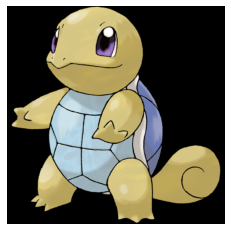

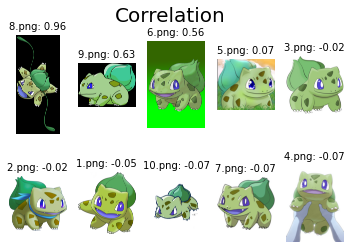

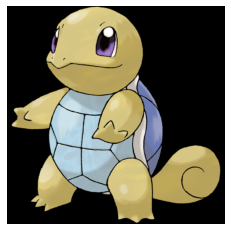

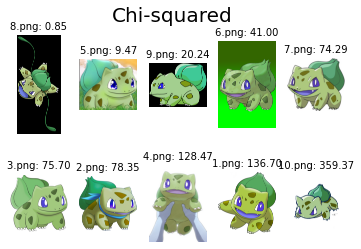

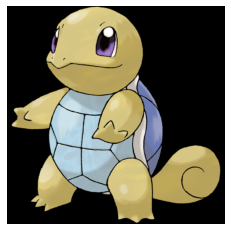

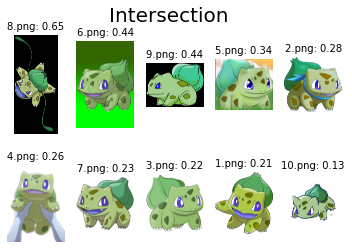

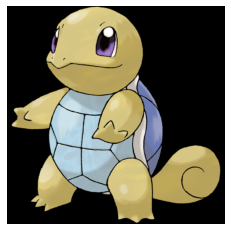

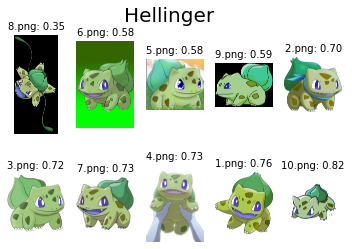

1


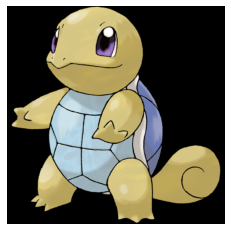

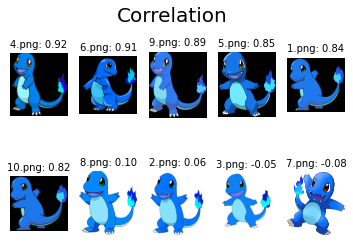

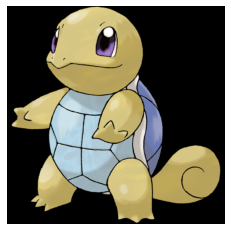

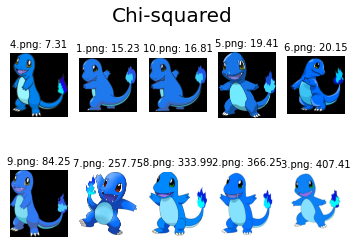

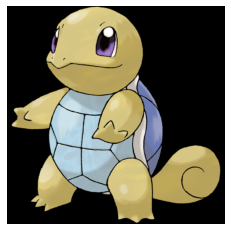

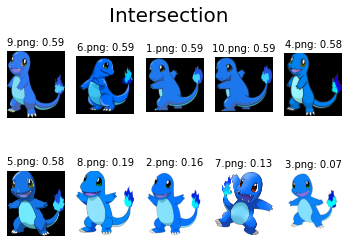

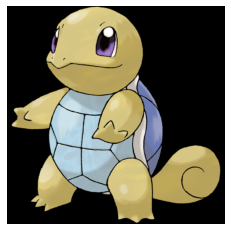

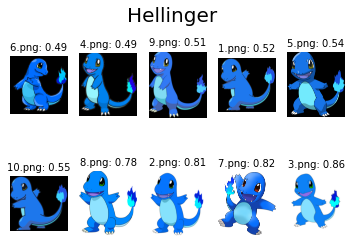

1


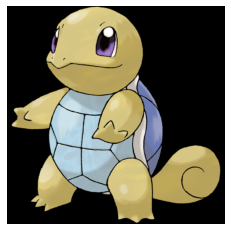

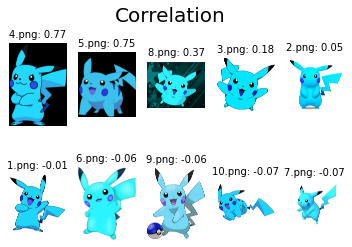

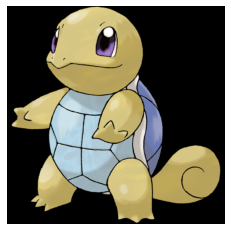

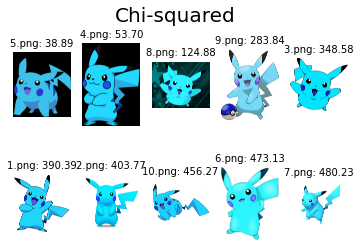

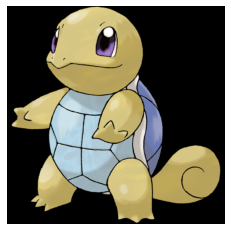

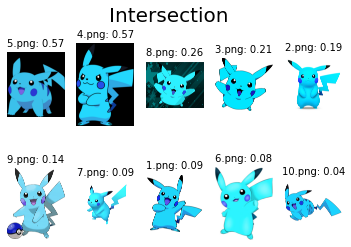

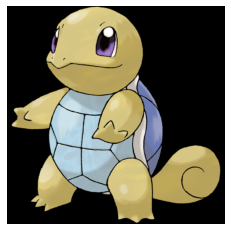

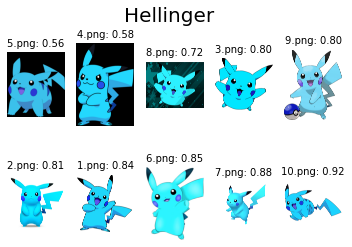

1


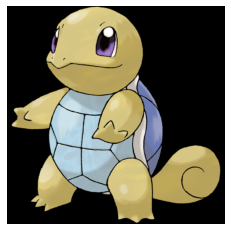

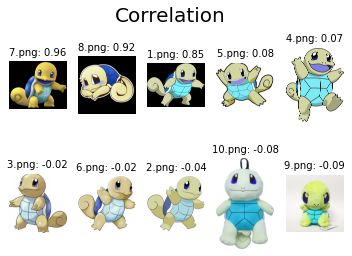

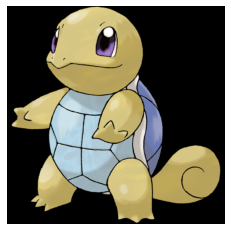

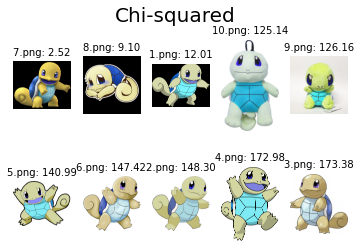

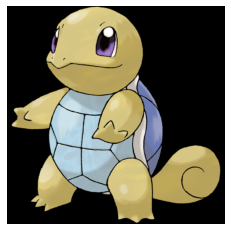

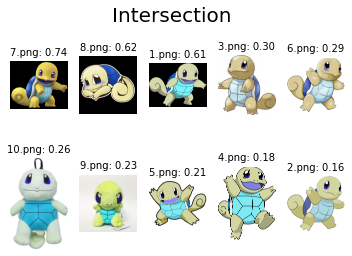

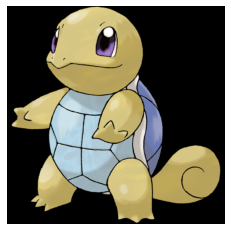

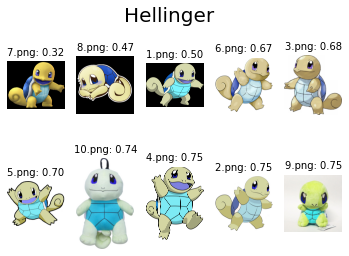

1


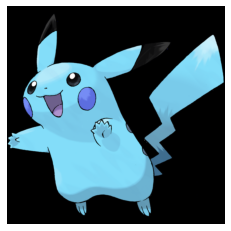

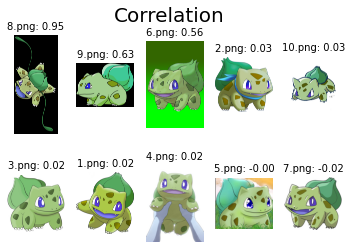

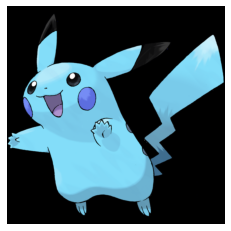

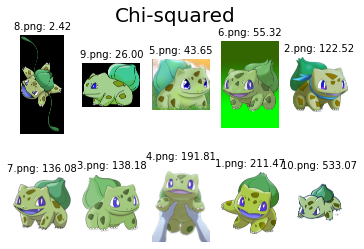

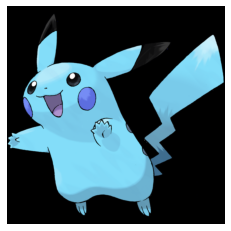

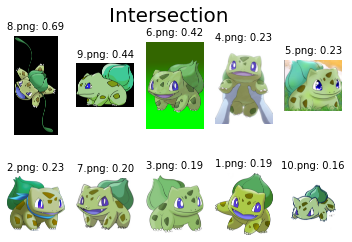

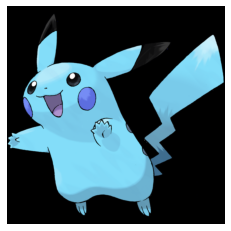

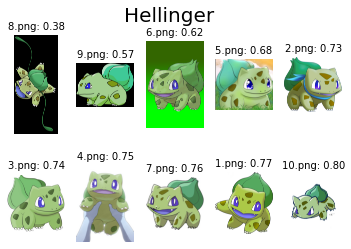

1


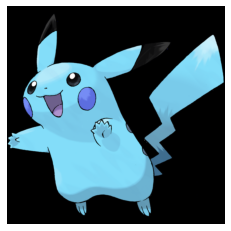

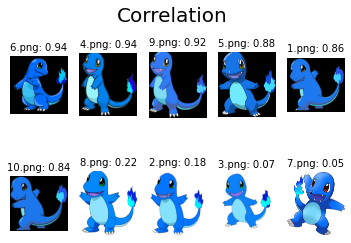

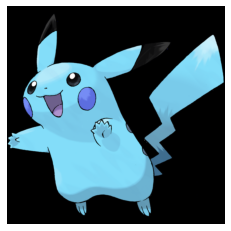

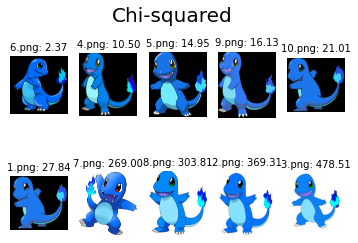

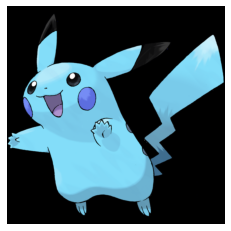

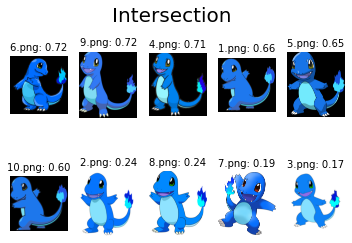

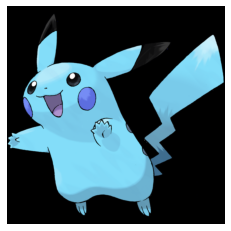

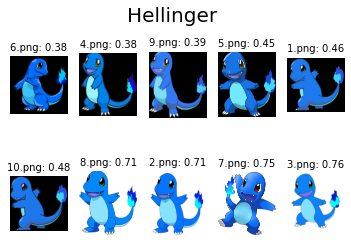

1


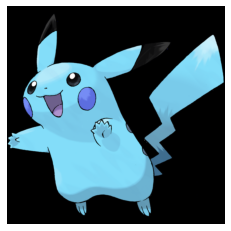

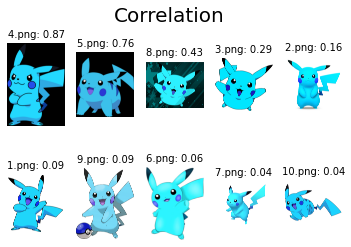

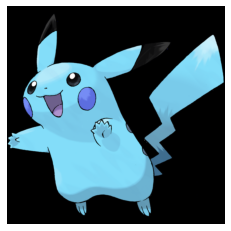

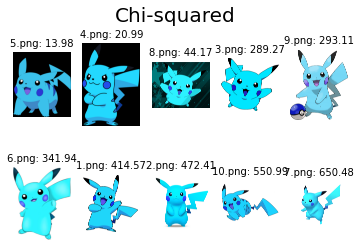

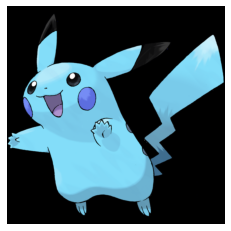

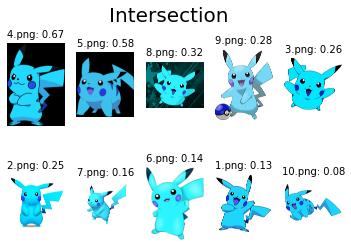

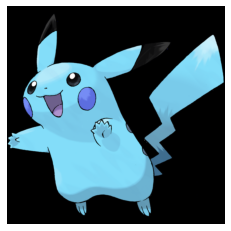

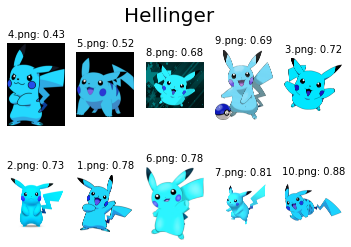

1


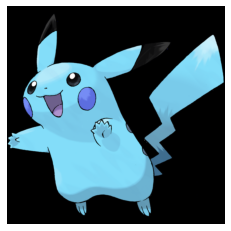

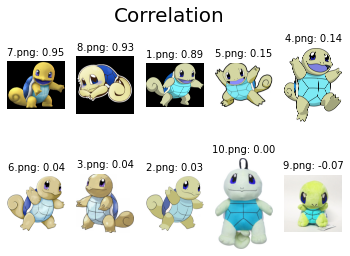

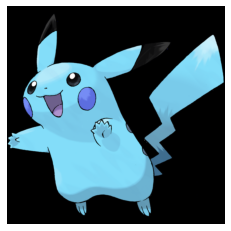

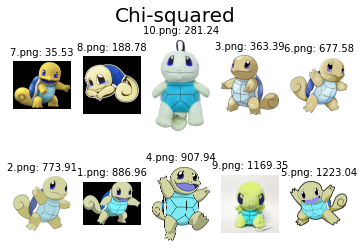

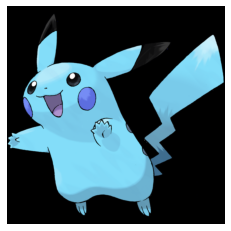

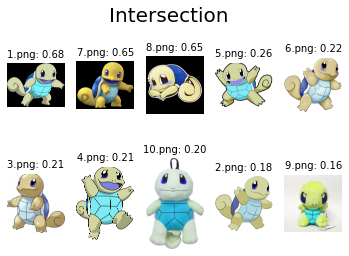

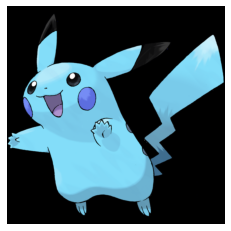

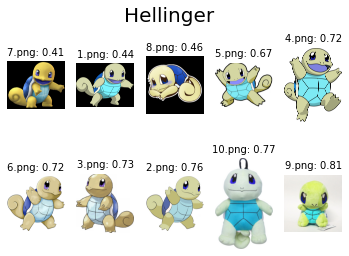

1


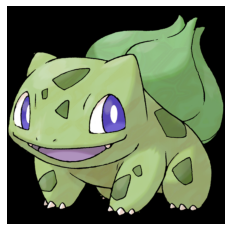

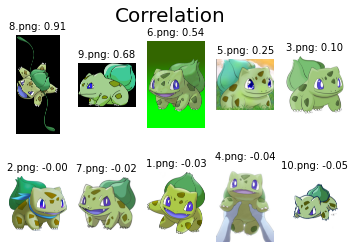

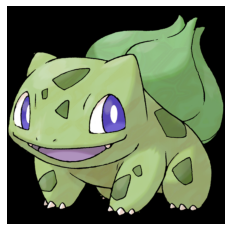

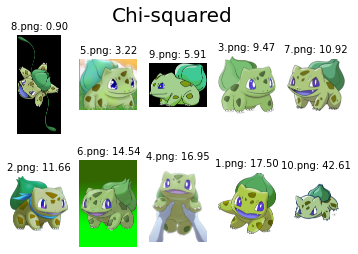

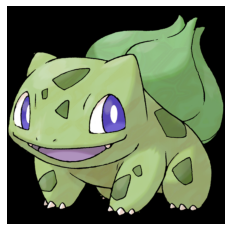

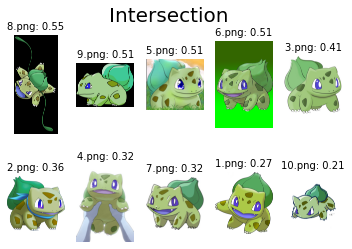

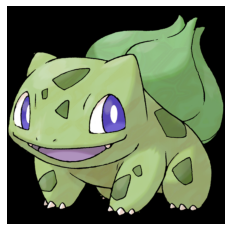

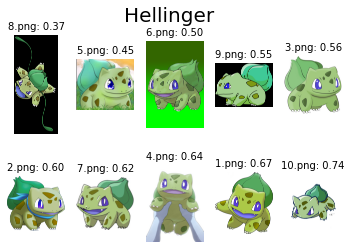

1


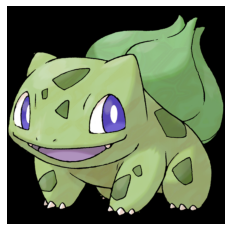

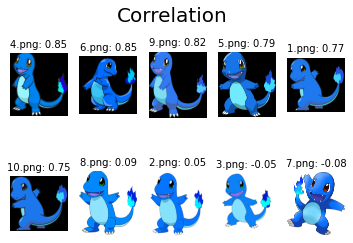

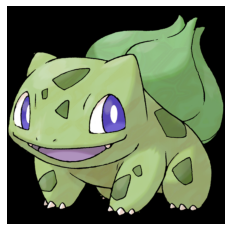

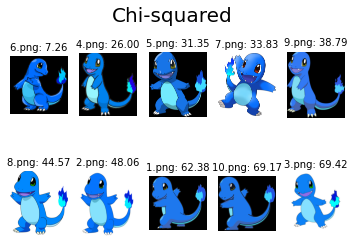

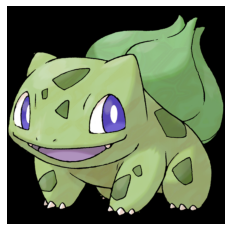

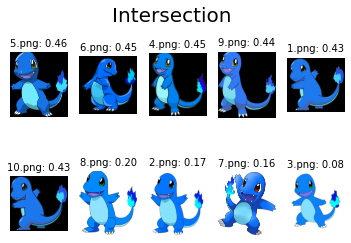

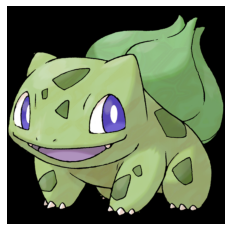

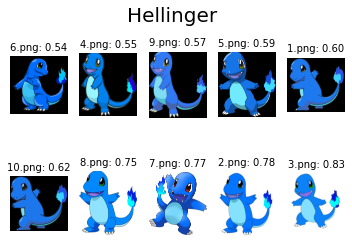

1


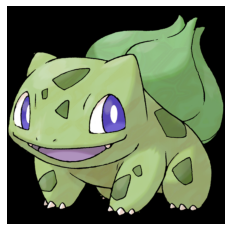

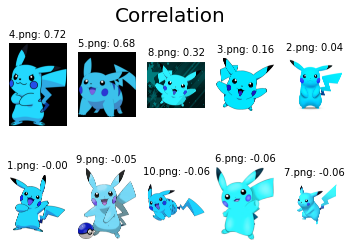

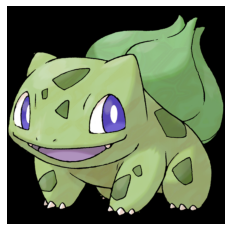

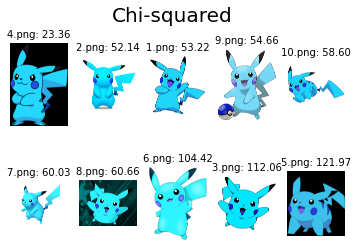

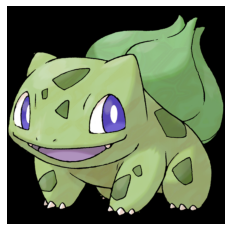

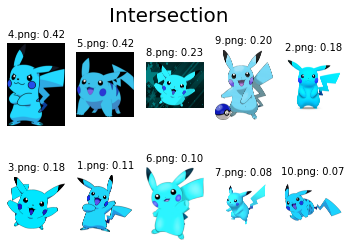

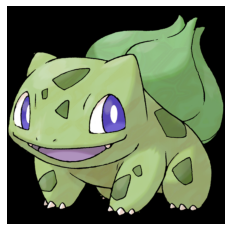

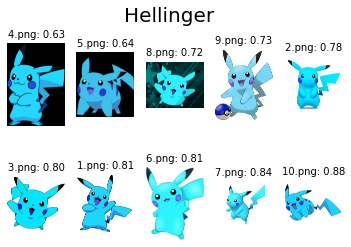

1


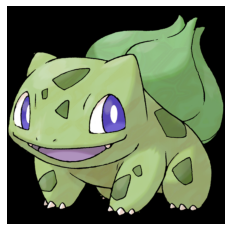

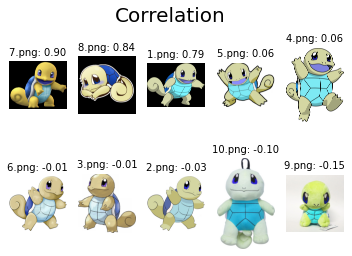

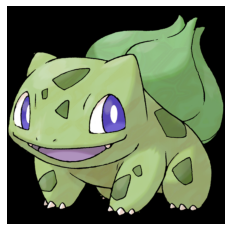

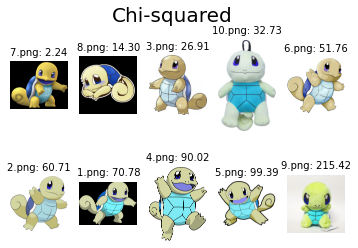

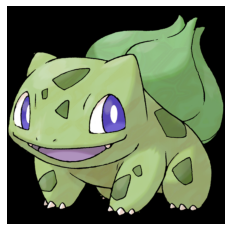

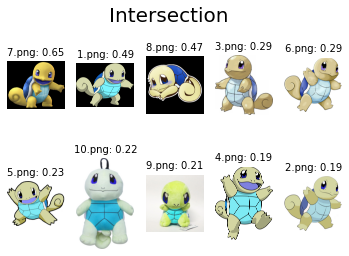

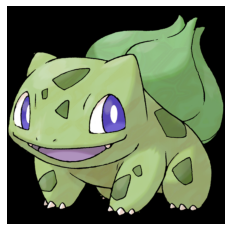

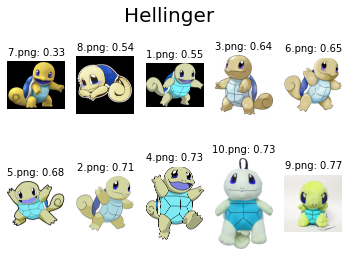

1


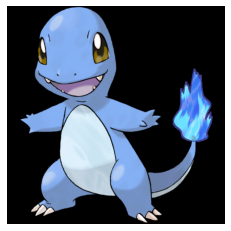

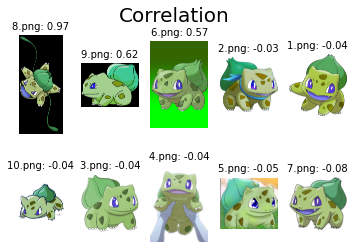

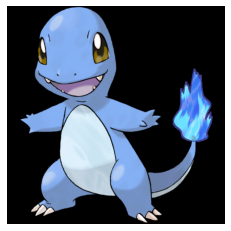

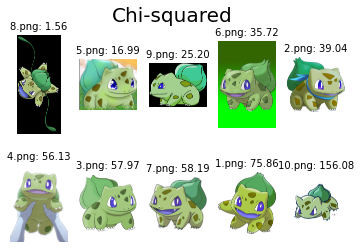

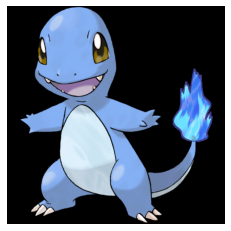

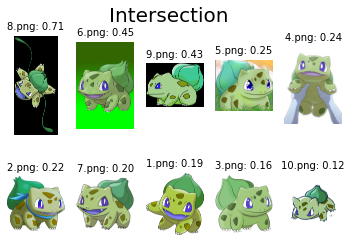

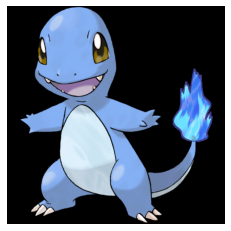

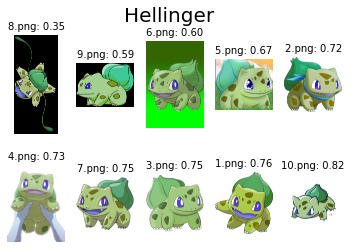

1


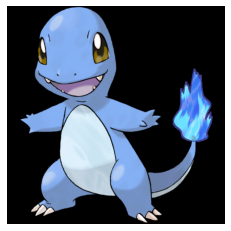

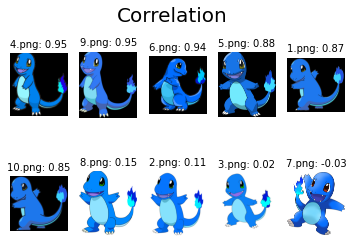

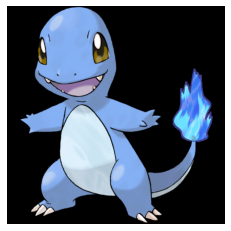

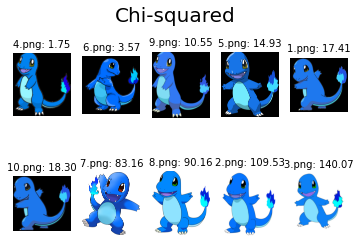

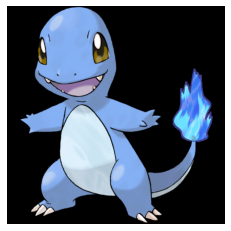

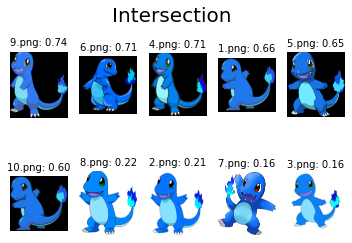

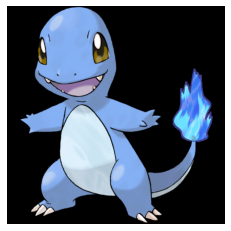

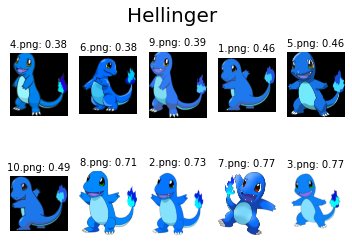

1


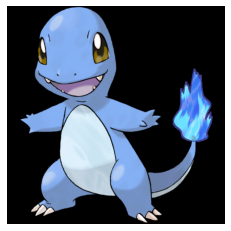

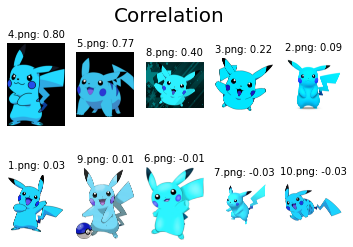

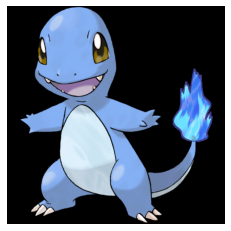

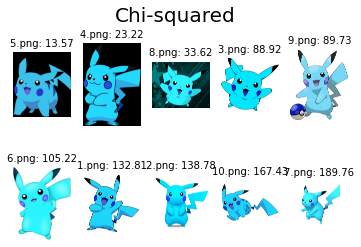

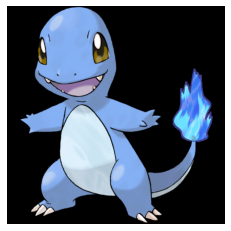

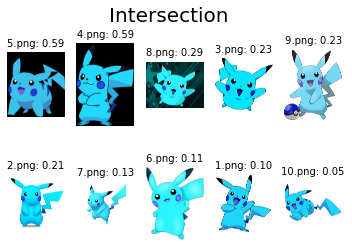

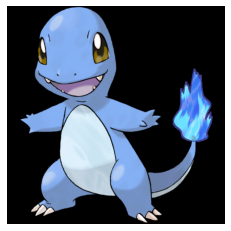

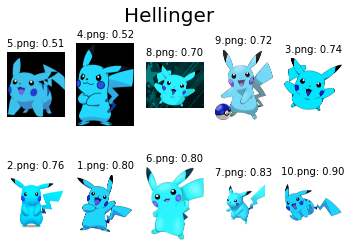

1


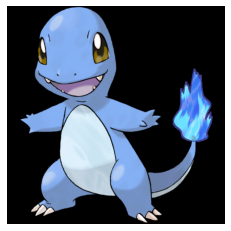

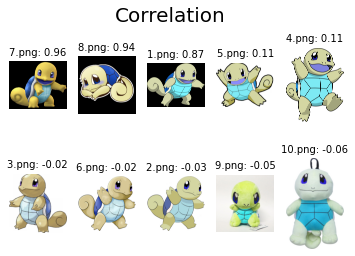

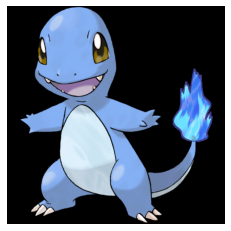

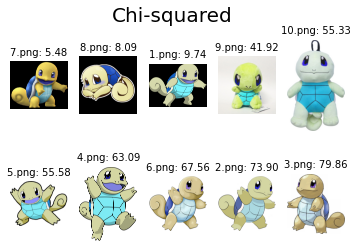

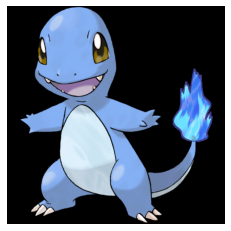

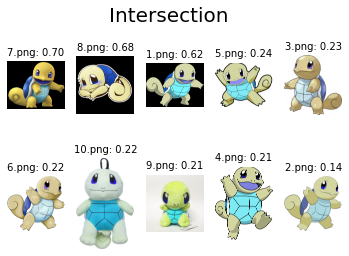

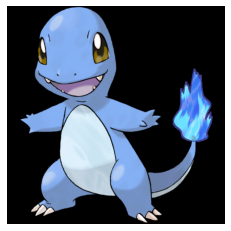

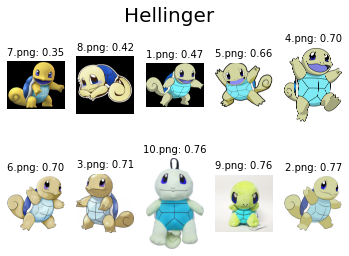

1


In [35]:
# Setup a triple dictionation [class_name of a target][class_name][histogram_name]
target_class_compare_dict = defaultdict(dict)
i = 0
for (image_name, hist_base) in hist_target_dict.items():
    
    #convert to target name
    target_class = image_name.split('.')[0].split('_')[1]
    for class_name in class_list:
        
        #if statements to control the image output
        if 0 <= i <= 3:
            case = 'target_squirtle.png'
        if 3 < i <= 7:
            case = 'target_pikachu.png'
        if 7 < i <= 11:
            case = 'target_bulbasaur.png'
        if 11 < i <= 15:
            case = 'target_charmander.png'
        if i > 15:
            i = 0
            
        if i==0 or i==4 or i==8 or i==12:
            case_1 = 'bulbasaur'
        if i==1 or i==5 or i==9 or i==13:
            case_1 = 'charmander'
        if i==2 or i==6 or i==10 or i==14:
            case_1 = 'pikachu'
        if i==3 or i==7 or i==11 or i==15:
            case_1 = 'squirtle'
            
        target_class_compare_dict[target_class][class_name] = compare_histogram(image_name, hist_base, hist_class_dict[class_name], case, case_1)
        
        print(iterator)
        
        i = i + 1

   